In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Tarea 1 **[25 pts]**

Sea $m\geq n$. Una matriz $T\in\mathbb{R}^{m\times n}$ se llama **triangular north-east** si
$T_{j,k}=0$ para $j>k$.

El objetivo de esta tarea es fabricar una función `qt` que a partir de una matriz $A\in\mathbb{R}^{m\times n}$
calcule una descomposición

\begin{align*}
QA = T
\end{align*}

con $Q\in\mathbb{R}^{m\times m}$ ortonormal y $T\in\mathbb{R}^{m\times n}$ triangular north-east. La función
`qt` debe usar reflexiones de Householder, es decir

\begin{align*}
Q = H_{w_n} \cdot \dots \cdot H_{w_1}.
\end{align*}

En vez de calcular $Q$ explicitamente, la función `qt` calcula la matriz

\begin{align*}
W =
\begin{pmatrix}
| & & |\\
w_1 & \dots & w_n\\
| & & |
\end{pmatrix}.
\end{align*}

La función debe tener la signatura

`(W,T) = qt(A)`.

Las matrices $A,W,T$ son todas del tipo `np.array`.

<hr>

Para que la notación sea congruente con lo estudiado en el curso y el apunte, se debe entender $Q$ como
$$Q = Q_n\cdot\dots\cdot Q_1$$
donde $Q_k$ se define como
\begin{align*}
Q_k =
\begin{pmatrix}
I_{k-1} & 0\\
0 & H
\end{pmatrix}.
\end{align*}
con $H$ la matriz de Householder asociada al paso k de dimensiones adecuadas.

Además se entiende a $W$ como la matriz cuadrada triangular inferior izquierda que contiene los vectores $w_k$ en el orden presentado arriba. Notese que los vectores son de dimensión $n-k+1$, luego la matriz $W$ carece de ciertos elementos, estos se rellenan por arriba por de cada $w_k" con 0 quedando la definición anterior.

Sobre la iteración $k$-ésima, si el vector en cuestión es múltiplo de $e_1$, entonces la matriz de Householder debe ser $I$, por lo tanto en tal caso asumiremos $w_k=0$ el vector nulo.


In [12]:
def printif(text ,var=1):
    '''print by a condition'''
    if var == 1:
        print(text)

def qt(A, verbose=0):
    '''Return a representation of the factorization QA=T with Q mxm orthonormal and T matrix mxn triangular north-east
     where W=(w_1,...,w_n)'''
    m, n = np.shape(A) # dimension
    # m<n error
    if m < n:
        raise ValueError("m must be greater or equal than n")
    A = A.astype(np.float64)
    W = np.zeros([m,n], dtype=np.float64)
    # Over iteration
    for k in range(n):
        printif(f"-------------  k = {k}  -------------", verbose)
        x_k = np.copy(A[k:,k])
        # if it is trivial case: x_1 = b*e_1, we asume w_k = 0
        if np.round(np.linalg.norm(x_k[1:], ord=2), 14) != 0:
            # lema 27
            printif("Calculating with lema 27", verbose)
            lmbda = -np.sign(x_k[0])
            sgm = lmbda*np.linalg.norm(x_k, ord=2)
            e_1 = np.eye(len(x_k), 1, dtype=int).flatten()
            W[k:,k] = x_k+sgm*e_1
            W[k:,k] /= np.linalg.norm(W[k:,k], ord=2)    
        printif(f"A:\n{A}", verbose)
        # Calculate the new value of A by HB
        printif(f"B:\n{A[k:,k:]}", verbose)
        wHB= np.matmul(np.transpose(np.reshape(W[k:,k],(-1,1))), A[k:,k:])
        A[k:,k:] -= 2*np.matmul(np.reshape(W[k:,k],(-1,1)), wHB) #w have norm 1 or 0
        printif(f"W:\n{W}", verbose)
    return (W, A)

# Tarea 2 **[25 pts]**

En un segundo paso, escriba una función

`(y) = evalHouseholder(W,x)`

que calcule $y = Qx$, donde $W$ representa a la matriz ortogonal $Q$ según las indicaciones de arriba.
La única restricción es que la función `evalHouseholder` debe pedir solamente la memoria para el vector $y$.

Bajo la escritura anterior, se puede notar que la notación es congruente, es decir, dada $w_k$ la k-ésima columna de la matriz $W$, entonces $H_{w_k}=Q_k$.
Demostración: Sea $\hat w_k$ el vector obtenido en el k-ésimo paso de la función $qt(A)$ de dimensión $n-k+1$, el cual corresponde a el mismo vector $w_k$ pero truncando los valores nulos sobre la diagonal principal de $W$, es decir:
\begin{align*}
w_k =
\begin{pmatrix}
0_{k-1}\\
\hat w_{k} 
\end{pmatrix}.
\end{align*}
como ya se discutió, si $w_k$ es el vector nulo, entonces se considera $H_{w_k}=I_n$, en otro caso, se tiene que $w_k$ es un vector normalizado y por ende de norma uno, y se verifica que $1=\lvert\lvert w_k \rvert\rvert_2^2=\lvert\lvert 0_{k-1} \rvert\rvert_2^2+\lvert\lvert \hat w_k \rvert\rvert_2^2=\lvert\lvert \hat w_k \rvert\rvert_2^2$, por lo tanto considerando los vectores y matrices de 0 adecuados:
$$
\begin{aligned}
H_{w_k} =
I_n
-
2w_k
w_k^T
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & I_{n-k+1}
\end{pmatrix}
-
2\begin{pmatrix}
0_{k-1}\\
\hat w_{k} 
\end{pmatrix}
\begin{pmatrix}
0_{k-1}^T & \hat w_{k}^T
\end{pmatrix}
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & I_{n-k+1}
\end{pmatrix}
-
2\begin{pmatrix}
0 & 0\\
0 & \hat w_k\hat w_k^T
\end{pmatrix}
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & H_{\hat w_k}
\end{pmatrix}
\end{aligned}
$$
 De esta forma, utilizando la representación adecuada, se puede calcular $y=Qx$ como
$$
 y=Qx=H_{w_n}\cdot\dots\cdot H_{w_1} x
$$
 donde si $w_k$ es el vector nulo, entonces $H_{w_k}x=x$ y en caso contrario, utilize la partición $x=(x_1^T,x_2^T)^T$ con $x_1$ el vector de las primeras $k-1$ coordenadas de x:
$$
\begin{aligned}
H_{w_k}x
=\begin{pmatrix}
I_{k-1} & 0\\
0 & H_{\hat w_k}
\end{pmatrix}
\begin{pmatrix}
x_{1}\\
x_2 
\end{pmatrix}
=
\begin{pmatrix}
x_{1}\\
H_{\hat w_k} x_2 
\end{pmatrix}
\end{aligned}
$$
donde este último producto debe ser computado como
$$
H_{\hat w_k} x_2 =(I_{n-k+1}-2\hat w_k \hat w_k^T)x_2
=x_2-2\hat w_k (\hat w_k^Tx_2)
$$
Por lo tanto el algoritmo evalHouseholder(W,x) puede ser expresado de la siguiente manera: paso 1: se renombra $x^{(1)}=x$ y se obtiene el producto interno entre $w_1$ y $x^{(1)}$ para calcular $x^{(2)} = x^{(1)}-2w_1(w_1^Tx^{(1)})$ guardandose en el mismo espacio de memoria que $x$, por lo tanto en el paso k se utiliza la misma lógica pero sólo actualizando las últimas $n-k+1$ coordenadas de $x$.

In [13]:
def evalHouseholder(W,x):
    '''Se realiza lo pedido únicamente utilizando el espacio de memoria de x'''
    x = x.astype(np.float64)
    m, n = np.shape(W)
    if len(x) != m:
        raise ValueError(f"Incongruent dimension, x has len {len(x)} while w vector are {m} dimensional")
    for k in range(n):
        #if w_k is not the null vector we work, in other case H_w_k = Identity
        if np.round(np.linalg.norm(W[:,k], ord=2), 14) != 0:
            innerproduct = np.matmul(np.transpose(W[k:,k]), x[k:])
            x[k:] -= 2*innerproduct*W[k:,k].reshape(np.shape(x[k:]))
    return x

# Tarea 3 **[25 pts]**


En un tercer paso aplicamos las funciones de arriba al problema de calcular $x\in\mathbb{R}^n$ tal que

\begin{align*}
\| b-Ax \|_2 = \min_{y\in\mathbb{R}^n}\| b-Ay \|_2
\end{align*}

**sin** usar las ecuaciones normales. Aplicaremos la técnica del Lemma 30 de los apuntes.

>- Con la notación anterior se tiene $QA=T$, por lo tanto se obtiene la matriz $R$ del lema con la función qt(A) de la primera tarea.
>- Utilizando la función evalHouseholder(W,x) de la segunda tarea se puede calcular el producto $Qb$.
>- Finalmente la solución de mínimos cuadrados proviene de resolver el sistema $Rx=b_1$ con $R$ matriz triangular superior, lo cual permite utilizar sustitución ascendente.

In [14]:
# Creada en laboratorios anteriores
def forward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

In [15]:
def minquad(A,b):
    n= np.shape(A)[1]
    W, T = qt(A)
    B = evalHouseholder(W,b)
    x = forward_substitution(T[:n,:n], B[:n])
    return x


# Tarea 4 **[25 pts]**

Invente unos ejemplos para testear sus funciones!

## Test sobre qt(A) and evalHouseholder(W,x)

> Para ver el correcto funcionamiento de qt(A) se usan ejemplos sencillos para que sean sencillos de visualizar.

In [16]:
k = 5 # Ejemplos
for i in range(k):
    print(f"-----------------  Ejemplo {i}  -----------------")
    
    # Over W, T = qt(A)
    m = np.random.randint(2, 6)
    n = np.random.randint(2, m+1) # m>=n
    A = np.random.rand(m, n)
    W, T = qt(A)
    # It is rounded to simplify interpretation.
    print(f"A:\n{np.round(A, 15)}")
    print(f"W:\n{np.round(W, 15)}")
    print(f"T:\n{np.round(T, 15)}")
    
    # Over y = evalHouseholder(W,x)
    x = np.random.rand(m)
    y = evalHouseholder(W,x)
    print(f"x:\n{np.round(x, 15)}")
    print(f"y:\n{np.round(y, 15)}")

-----------------  Ejemplo 0  -----------------
A:
[[0.76348426 0.17863604]
 [0.26745197 0.47096066]
 [0.89845403 0.21087739]]
W:
[[-0.42924031  0.        ]
 [ 0.25768691 -0.23586716]
 [ 0.86565016 -0.97178531]]
T:
[[1.20899066 0.37370744]
 [0.         0.39815424]
 [0.         0.        ]]
x:
[0.76307314 0.67752184 0.44666795]
y:
[ 0.96370431  0.47581359 -0.29275272]
-----------------  Ejemplo 1  -----------------
A:
[[0.74461959 0.49840575]
 [0.58588208 0.89419336]
 [0.55249691 0.23408303]
 [0.1386387  0.71723604]
 [0.55652571 0.8282096 ]]
W:
[[-0.44631057  0.        ]
 [ 0.53030577  0.69178822]
 [ 0.50008748 -0.56958802]
 [ 0.12548754  0.44121894]
 [ 0.50373411 -0.04821195]]
T:
[[ 1.23770373  1.28035593]
 [ 0.         -0.81475904]
 [ 0.          0.        ]
 [ 0.         -0.        ]
 [ 0.          0.        ]]
x:
[0.0893986  0.30465545 0.0599895  0.45087305 0.08110757]
y:
[ 0.31174749 -0.39573528  0.16999394  0.11015246 -0.13945007]
-----------------  Ejemplo 2  -----------------
A:

## Test sobre x = minquad(A,b)

> A continuación se presentan los errores en varios intentos, donde el error se calcula como la norma de la diferencia entre la solución de mínimos cuadrados calculada siguiendo el trabajo indicado por el laboratorio y la entregada mediante funciones documentadas y probadas de la librería Numpy. Por lo tanto se evaluará si el código creado funciona mediante comparar su resultado con una función ya probada y establecida que resuelve utilizando descomposición SVD.

In [17]:
k = 1000 # intentos
tol = 1e-14
Victory = 0
Defeat = 0
errores = []
partial_ratio = []

for i in range(k):
    m = np.random.randint(1, 201)
    n = np.random.randint(1, m+1) # m>=n
    A = np.random.rand(m, n)
    b = np.random.rand(m)

    minbySVD = np.linalg.lstsq(A, b, rcond=None)[0] # Valor de comparación de una función ya probada y documentada de numpy
    diff = np.linalg.norm(minbySVD - minquad(A, b), ord=2)
    errores.append(diff)
    
    # Low error implies the same solution
    if diff < tol:
        Victory +=1
    else:
        Defeat +=1
    partial_ratio.append(Victory/(i+1))
print(f"The result is:\n\t- Victory: {Victory}\n\t- Defeat: {Defeat}")
print(f"The function work with similar results in the {Victory/k *100}% of the cases, in comparation with np.linalg.lstsq with a tol: {tol}")

The result is:
	- Victory: 833
	- Defeat: 167
The function work with similar results in the 83.3% of the cases, in comparation with np.linalg.lstsq with a tol: 1e-14


> Ahora generando gráficos para visualizar la distribución de los errores y estudiarlos:

In [18]:
import pandas as pd
df =  pd.DataFrame(np.array(errores))
descripcion = df.describe()
print(descripcion)

                  0
count  1.000000e+03
mean   2.152150e-14
std    3.029919e-13
min    0.000000e+00
25%    1.213777e-15
50%    2.541309e-15
75%    6.028666e-15
max    9.323601e-12


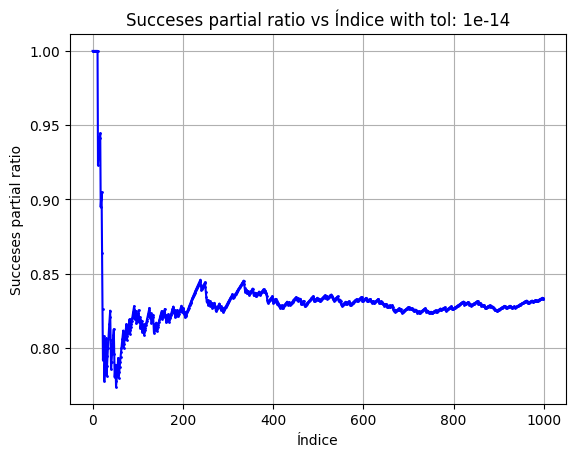

In [19]:
indices = np.arange(len(partial_ratio))
plt.plot(indices, partial_ratio, marker='o', linestyle='-', color='blue', markersize=1)
plt.xlabel('Índice')
plt.ylabel('Succeses partial ratio')
plt.title(f'Succeses partial ratio vs Índice with tol: {tol}')
plt.grid(True)

# Mostrar el gráfico
plt.show()

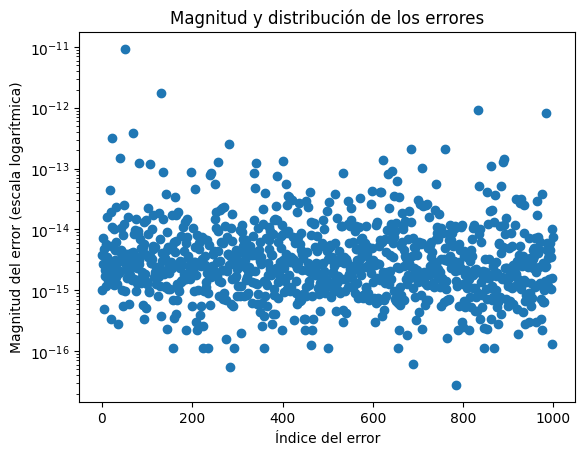

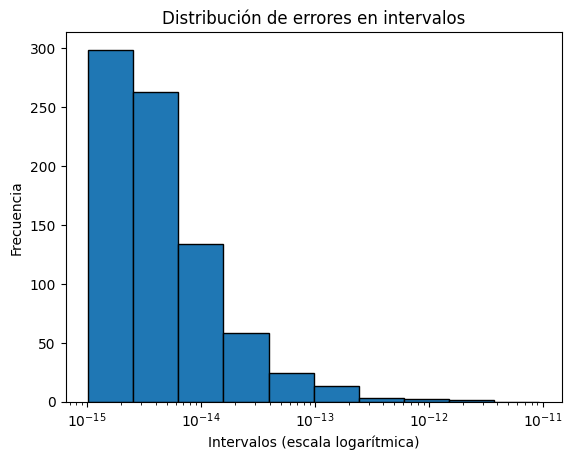

In [20]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los errores en un diagrama de dispersión (scatter plot)
ax.scatter(range(len(errores)), errores)

# Establecer escala logarítmica en el eje y
ax.set_yscale('log')

# Establecer etiquetas de los ejes
ax.set_xlabel('Índice del error')
ax.set_ylabel('Magnitud del error (escala logarítmica)')

# Establecer título del gráfico
ax.set_title('Magnitud y distribución de los errores')

# Mostrar el gráfico
plt.show()

# Definir los límites de los intervalos
elementos_no_cero = errores[errores!= 0]

minimo_no_cero = np.min(elementos_no_cero)
intervalos = np.logspace(np.log10(minimo_no_cero), np.log10(max(errores)), num=11)

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras con escala logarítmica en el eje x
n, bins, patches = ax.hist(errores, bins=intervalos, edgecolor='black')

# Establecer escala logarítmica en el eje x
ax.set_xscale('log')

# Establecer etiquetas de los ejes
ax.set_xlabel('Intervalos (escala logarítmica)')
ax.set_ylabel('Frecuencia')

# Establecer título del gráfico
ax.set_title('Distribución de errores en intervalos')

# Mostrar el gráfico
plt.show()